In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

Data upload

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML 3rd month\WineQT.csv")

Data exploration

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.7,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3.0
4,7.4,0.7,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1144 non-null   object 
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   object 
 4   chlorides             1143 non-null   object 
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1142 non-null   float64
 12  Id                    1141 non-null   float64
dtypes: float64(10), object(3)
memory usage: 116.4+ KB


In [24]:
df.isnull().sum()

fixed acidity           2
volatile acidity        1
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     2
total sulfur dioxide    2
density                 2
pH                      2
sulphates               2
alcohol                 2
quality                 3
Id                      4
dtype: int64

# Data preprocessing

Data cleaning

In [3]:
df.drop(columns=['Id'], inplace=True)

In [25]:
non_numeric_rows = df[~df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).notna().all(axis=1)]

print("Rows with non-numeric values:")
print(non_numeric_rows)


Rows with non-numeric values:
    fixed acidity volatile acidity  citric acid  residual sugar chlorides  \
22            6.7         0.675 he        0.070           2.400    0.089e   
24            5.2             0.32          NaN             NaN       NaN   
25            NaN              1.8        0.103          13.000      50.0   
28            8.1              NaN          NaN             NaN       NaN   
29            NaN             0.28        2.100           0.066      0.8e   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
22              17.0000               82.0000   0.9958  3.35       0.54   
24                  NaN                   NaN      NaN   NaN        NaN   
25               0.9957                3.3800   0.5500  9.20       5.00   
28                  NaN                   NaN      NaN   NaN        NaN   
29              30.0000                0.9968   3.2300  0.73       9.70   

    alcohol  quality    Id  
22     10.1      5.0  30.0 

In [14]:
non_numeric_values = df.loc[pd.to_numeric(df['residual sugar'], errors='coerce').isna(), 'residual sugar']

print("Non-numeric values in 'residual sugar':")
print(non_numeric_values)

Non-numeric values in 'residual sugar':
10    1.6 percent
24            NaN
28            NaN
Name: residual sugar, dtype: object


In [4]:
df['residual sugar'] = df['residual sugar'].astype(str).str.extract(r'([0-9.]+)')
df['residual sugar'] = pd.to_numeric(df['residual sugar'], errors='coerce')

In [26]:
non_numeric_values

24   NaN
28   NaN
Name: residual sugar, dtype: float64

In [27]:
non_num = df.loc[pd.to_numeric(df['volatile acidity'], errors='coerce').isna(), 'volatile acidity']
non_num

22    0.675 he
28         NaN
Name: volatile acidity, dtype: object

In [5]:
df['volatile acidity'] = df['volatile acidity'].astype(str).str.extract(r'([0-9.]+)')
df['volatile acidity'] = pd.to_numeric(df['volatile acidity'], errors='coerce')

In [ ]:
non_num

28   NaN
Name: volatile acidity, dtype: float64

In [6]:
for col in df.columns:
  if df[col].dtype == 'number':
    df[col].fillna(df[col].mean(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [37]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1145 non-null   float64
 1   volatile acidity      1145 non-null   float64
 2   citric acid           1145 non-null   float64
 3   residual sugar        1145 non-null   float64
 4   chlorides             1145 non-null   object 
 5   free sulfur dioxide   1145 non-null   float64
 6   total sulfur dioxide  1145 non-null   float64
 7   density               1145 non-null   float64
 8   pH                    1145 non-null   float64
 9   sulphates             1145 non-null   float64
 10  alcohol               1145 non-null   float64
 11  quality               1145 non-null   float64
dtypes: float64(11), object(1)
memory usage: 107.5+ KB


Mutual information

In [13]:
numerical_cols = df.select_dtypes(exclude='object').columns
y = df['quality']
x = df[numerical_cols].drop(columns=['quality'])

mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({'Feature': x.columns, 'Mutual Info': mi})
mi_df = mi_df.sort_values(by='Mutual Info', ascending=False)
mi_df

,Feature,Mutual Info
9,alcohol,0.215541
8,sulphates,0.112443
1,volatile acidity,0.108412
5,total sulfur dioxide,0.094548
2,citric acid,0.079702
6,density,0.064144
0,fixed acidity,0.049393
3,residual sugar,0.033063
4,free sulfur dioxide,0.032078
7,pH,0.018313


Feature engineering

In [14]:
df['sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['acid_ratio'] = df['fixed acidity'] / df['volatile acidity']
df['density_alcohol_ratio'] = df['density'] / df['alcohol']

df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
df['acid_sugar_balance'] = df['total_acidity'] / df['residual sugar']

In [16]:
numerical_cols = df.select_dtypes(exclude='object').columns
y = df['quality']
x = df[numerical_cols].drop(columns=['quality'])

mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({'Feature': x.columns, 'Mutual Info': mi})
mi_df = mi_df.sort_values(by='Mutual Info', ascending=False)
mi_df

,Feature,Mutual Info
12,density_alcohol_ratio,0.244099
9,alcohol,0.204446
8,sulphates,0.114639
11,acid_ratio,0.107527
5,total sulfur dioxide,0.098532
1,volatile acidity,0.094672
10,sulfur_ratio,0.093872
2,citric acid,0.069747
13,total_acidity,0.059961
6,density,0.044690


In [18]:
df.drop(columns=['free sulfur dioxide', 'residual sugar', 'pH', 'acid_sugar_balance'], inplace=True)

Encoding

In [19]:
cat_col = df.select_dtypes(include='object').columns

for col in cat_col:
    cardinality = df[col].nunique()
    
    if cardinality >= 20:
        # Frequency encoding
        freq_map = df[col].value_counts()
        df[col] = df[col].map(freq_map)
        
    elif 5 <= cardinality < 20:
        # Label encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        
    else:
        # One-hot encoding
        df = pd.get_dummies(df, columns=[col], dtype=int, drop_first=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed acidity          1145 non-null   float64
 1   volatile acidity       1145 non-null   float64
 2   citric acid            1145 non-null   float64
 3   residual sugar         1145 non-null   float64
 4   chlorides              1145 non-null   int64  
 5   free sulfur dioxide    1145 non-null   float64
 6   total sulfur dioxide   1145 non-null   float64
 7   density                1145 non-null   float64
 8   pH                     1145 non-null   float64
 9   sulphates              1145 non-null   float64
 10  alcohol                1145 non-null   float64
 11  quality                1145 non-null   float64
 12  sulfur_ratio           1145 non-null   float64
 13  acid_ratio             1145 non-null   float64
 14  density_alcohol_ratio  1145 non-null   float64
 15  tota

Scaling

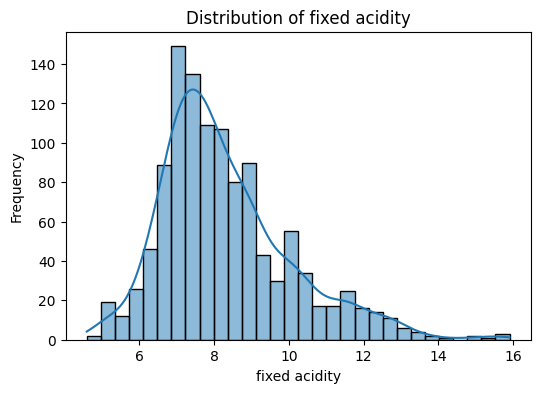

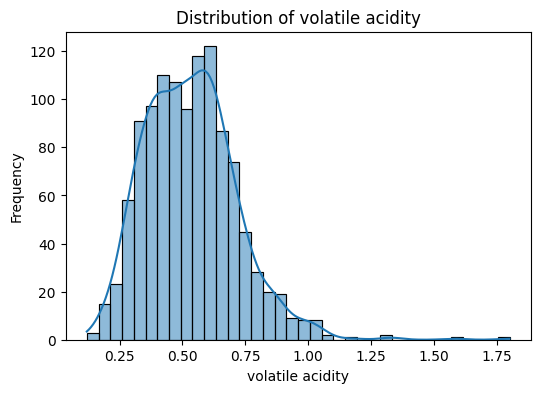

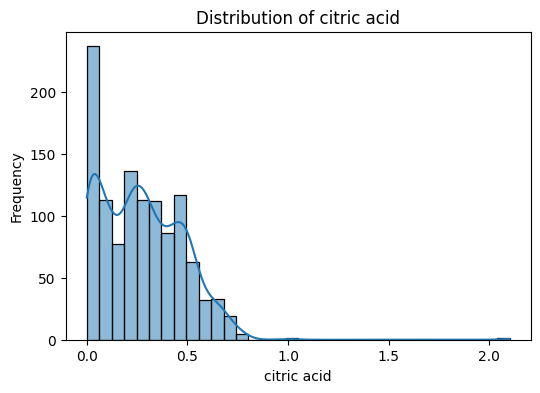

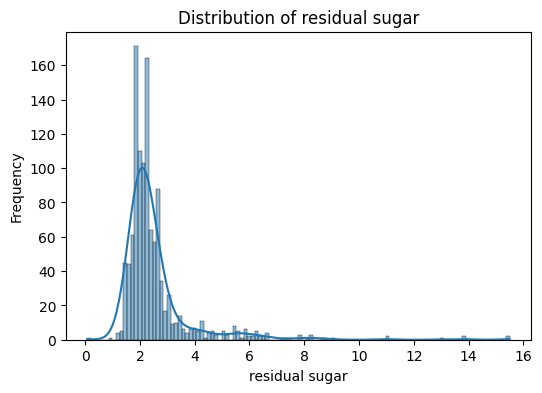

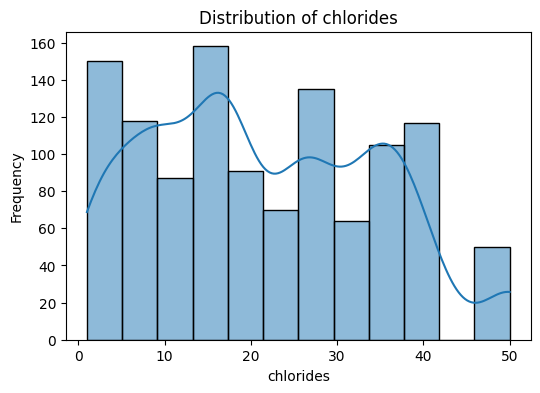

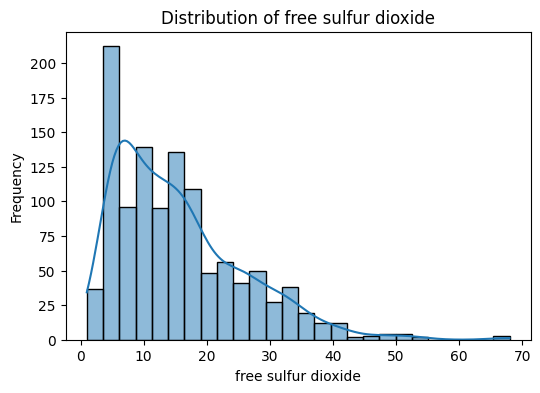

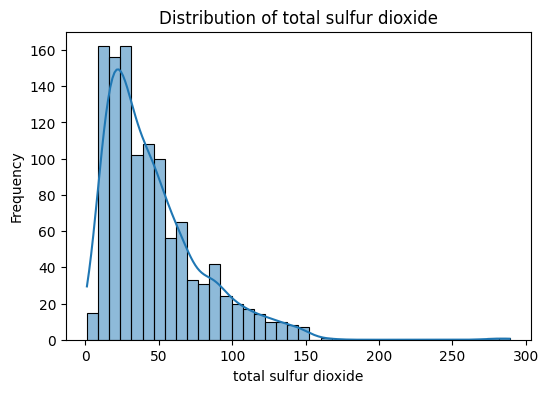

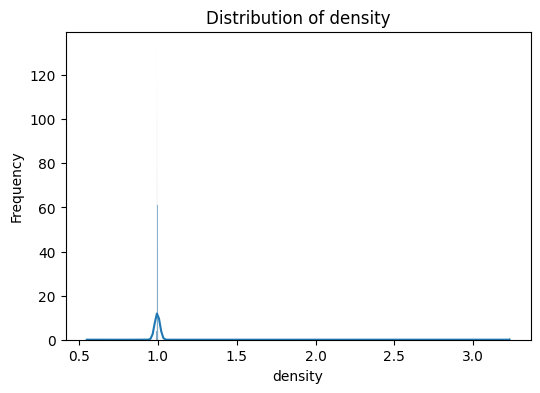

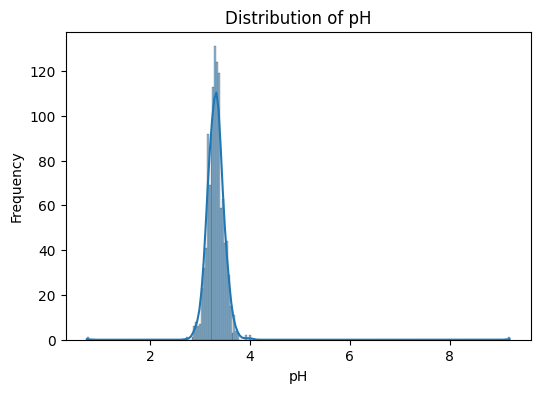

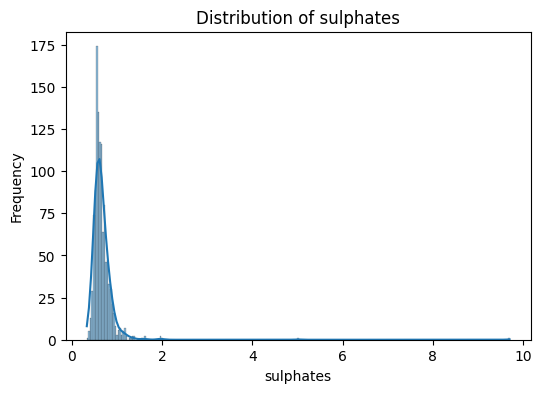

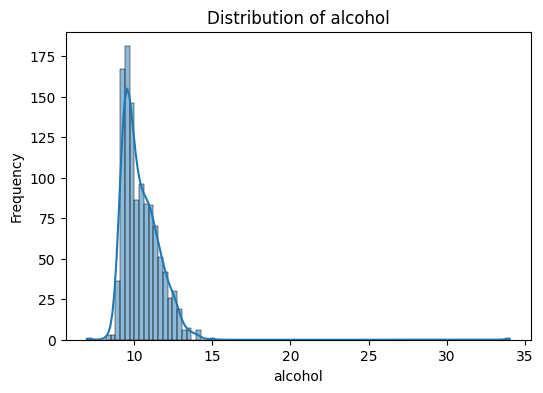

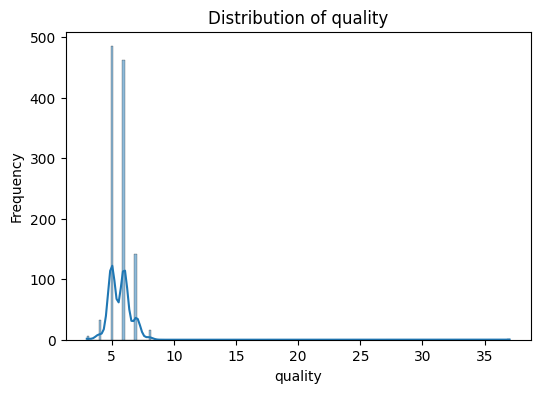

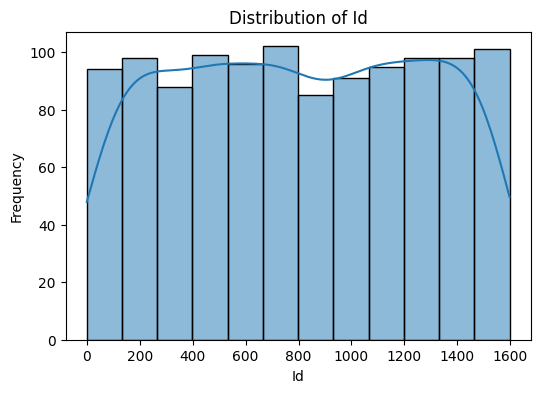

In [ ]:
# Checking the skewness of columns before scaling to apply right scaling technique

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [12]:
normal_dist_cols = ['quality', 'pH', 'density', 'residual sugar']

all_cols = df.columns.to_list()

skewed_cols = [col for col in all_cols if col not in normal_dist_cols]


In [71]:
normal_dist_cols

['quality', 'pH', 'density', 'residual sugar']

In [13]:
skewed_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates',
 'alcohol',
 'sulfur_ratio',
 'acid_ratio',
 'density_alcohol_ratio',
 'total_acidity',
 'acid_sugar_balance']

In [14]:
scaler = StandardScaler()
r_scaler = RobustScaler()

df[normal_dist_cols] = scaler.fit_transform(df[normal_dist_cols])

df[skewed_cols] = r_scaler.fit_transform(df[skewed_cols])

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=df.columns)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,sulfur_ratio,acid_ratio,density_alcohol_ratio,total_acidity
0,-0.520740,0.914375,-1.319641,0.876890,-0.360341,-0.007325,-0.320043,-0.821913,-0.556155,-0.092609,-0.810071,0.652813,-0.549439
1,-0.291634,1.896001,-1.319641,-0.945047,0.645911,-0.022180,0.031242,-0.511689,-0.556155,-0.036949,-0.994377,0.347338,-0.234187
2,-0.291634,1.241583,-1.123671,-0.337735,0.249509,-0.019209,-0.056579,-0.511689,-0.556155,-0.143944,-0.843339,0.348744,-0.277670
3,1.655762,-1.376087,1.423932,0.952804,0.432464,-0.004354,-0.261496,-0.511689,0.259207,-0.137711,2.365878,0.355773,1.592096
4,-0.520740,0.914375,-1.319641,0.876890,-0.360341,-0.007325,-0.320043,-0.821913,-0.556155,-0.092609,-0.810071,0.652813,-0.549439


Model selection

In [22]:
x = df.drop(columns=['quality'])
y = df['quality']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
x_train.shape, y_train.shape

((916, 12), (916,))

In [24]:
x_val.shape, y_val.shape

((115, 12), (115,))

Model training

In [ ]:
model = RandomForestRegressor(random_state=42)
r_model = model.fit(x_train, y_train)

model = DecisionTreeRegressor(random_state=42)
dt_model = model.fit(x_train, y_train)

In [ ]:
y_pred = r_model.predict(x_val)

y_pred = dt_model.predict(x_val)

In [84]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"{mse: .2f}")
print(f"{r2: .2f}")

 0.24
 0.46


In [ ]:
# no feature engineering
# mse: 0.24
# r2: 0.46

In [19]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"{mse: .2f}")
print(f"{r2: .2f}")

 0.24
 0.46


In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(r_model, x, y, cv=kf, scoring='neg_mean_squared_error')

cv_scores = np.sqrt(-cv_score)

print("RMSE scores for each fold:", cv_scores)

print("Mean RMSE:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

RMSE scores for each fold: [0.49597942 1.78458041 0.44430984 0.50741262 0.45062355]
Mean RMSE: 0.736581165195893
Standard Deviation: 0.5245768079270042


In [29]:
from tabulate import tabulate

In [32]:
headers = ['Model', 'Status', 'MSE', 'R2']
data = [
  ['DecisionTreeRegressor', 'Feature engineering ❌', mse, r2],
  ['RandomForestRegressor','Feature engineering ❌', 0.24, 0.46],
  ['RandomForestRegressor', 'Feature engineering ✅', 0.24, 0.46]
     ]

result = tabulate(data, headers=headers, tablefmt='grid')
print(result)

+-----------------------+------------------------+----------+-----------+
| Model                 | Status                 |      MSE |        R2 |
+=======================+========================+==========+===========+
| DecisionTreeRegressor | Feature engineering ❌ | 0.531852 | -0.211358 |
+-----------------------+------------------------+----------+-----------+
| RandomForestRegressor | Feature engineering ❌ | 0.24     |  0.46     |
+-----------------------+------------------------+----------+-----------+
| RandomForestRegressor | Feature engineering ✅ | 0.24     |  0.46     |
+-----------------------+------------------------+----------+-----------+
